In [1]:
from mathpad import *

# simple pendulum example using lagrange

theta = "theta(t)" * rad
m = "m" * kg
l = "l" * meters
g = "g" * meters / second ** 2

tabulate(theta, m, l, g)

┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃  Entity   ┃         Units   ┃
┣━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━┫
┃  theta(t) ┃          radian ┃
┃         m ┃        kilogram ┃
┃         l ┃           meter ┃
┃         g ┃ meter/second**2 ┃
┗━━━━━━━━━━━┻━━━━━━━━━━━━━━━━━┛



In [2]:
# abs velocity of pendulum
v = l * diff(theta)

from mathpad.mech import euler_lagrange, kinetic_energy, gravitational_energy

T = kinetic_energy(m, v)
T

0.5*l**2*m*Derivative(theta(t), t)**2 kilogram*meters**2*radian**2/second**2

In [3]:
# potential energy
h = l * cos(theta)
V = gravitational_energy(m, h, g)
V

g*l*m*cos(theta(t)) kilogram*meters**2/second**2

In [4]:
theta_dynamics = euler_lagrange(T, V, 0, theta)
theta_dynamics

l*m*(g*sin(theta(t)) + l*Derivative(theta(t), (t, 2))) = 0 kilogram*meter**2*radian/second**2

In [5]:
from sympy import Function, Derivative
eqn = theta_dynamics.as_sympy_eq()
ddtheta = eqn.atoms(Derivative).pop()
ddtheta

  2      
 d       
───(θ(t))
  2      
dt       

In [6]:
ddtheta = diff(theta, n=2)
solve(theta_dynamics, ddtheta, in_place=True)
ddtheta

-g*sin(theta(t))/l radians/second**2

Solving Equations:


m*(4.95*sin(theta(t)) + 0.25*Derivative(theta(t), (t, 2))) = 0 kilogram*meter**2*radian/second**2

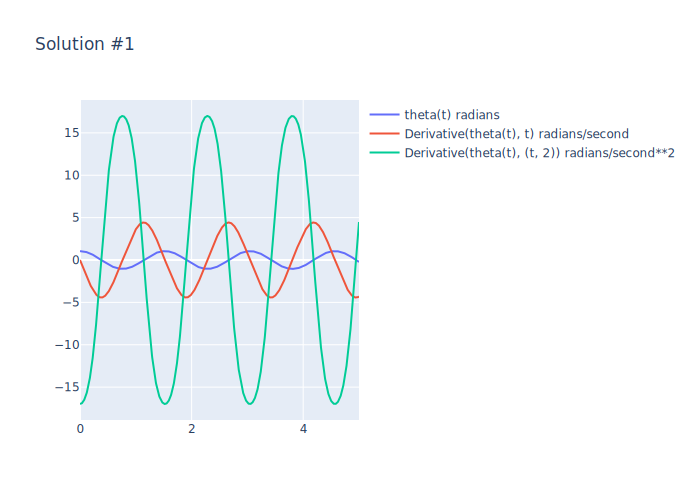

[(0, [1.0471975511965979, 0.0, -16.99141842225069]), (5.879709136312393e-07, [
1.0471975511965979, -9.990459813621409e-06, -16.99141842225069]), (1.175941827
2624787e-05, [1.0471975511965979, -0.00019980919627242817, -16.99141842225069]
), (1.763912740893718e-05, [1.047197548553253, -0.00029971379440864223, -16.99
1418396319474]), (4.7037673090499146e-05, [1.0471975323994784, -0.000799236779
6686274, -16.991418237850944]), (5.226408121166571e-05, [1.0471975279902777, -
0.0008880408604981378, -16.991418194596683]), (5.879709136312393e-05, [1.04719
7521826099, -0.0009990459684254636, -16.991418134126086]), (5.879709136312393e
-05, [1.047197521826099, -0.0009990459757151778, -16.991418134126086]), (0.000
1763912740893718, [1.047197404344104, -0.0029971379045576818, -16.991416981627
54]), (0.0002351883654524957, [1.0471970812686207, -0.0039961837165109195, -16
.991413812255356]), (0.0005291738222681154, [1.0471951721865385, -0.0089914071
85780734, -16.991395084113922]), (0.0005814379034797

In [7]:

simulate_dynamic_system([theta_dynamics], x_f=5, max_step=0.01, substitute={
    g: 9.81,
    l: 0.5
}, initial_conditions={
    theta: pi / 3,
    diff(theta): 0
}, record=[theta, diff(theta), diff(theta, n=2)], interactive_plots=False)
